**Исходные данные**

Датасет по продажам и рейтингам компьютерных игр для разных платформ в разных регионах с 1980-х годов до 2016 года
    
**Цель исследования**
- определить влияние различных параметров игр (платформа, рейтинг) на продажи
- исследовать различия продаж по регионам
- определить наиболее перспективные направления и тактику рекламной кампании на ближайший год

## Предобработка данных

</font><font color='Blue'>

**Задача - подготовка данных для анализа**
- изучить общую информацию о датасете
- привести названия столбцов к общепринятому стилю
- проанализировать наличие пропусков и решить, что делать с пропущенными значениями
- проверить отсутствие явных дубликатов
- при необходимости скорректировать тип данных в столлбцах

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('games.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
#проверка на явные дубликаты
df.duplicated().sum()

0

### Приведение к нижнему регистру названий столбцов

In [6]:
for col_name in df.columns:
    df = df.rename(columns={col_name: col_name.lower()})

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Заполнение пропусков и изменение типов данных

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
df = df.dropna(subset=['year_of_release'])
df = df.astype({"year_of_release": "int"})

In [11]:
df = df.dropna(subset=['name'])

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что удалили пропуски, тем более в этих строках еще хватает пропусков по другим колонкам.</font>

Для неопределенного рейтинга и рейтинга пользователей используются заглушки: 'other' и -1 соответственно

In [12]:
df['user_score'] = df['user_score'].replace('tbd', '-1')
df['user_score'] = df['user_score'].astype('float')
df['rating'] = df['rating'].fillna('other')

In [13]:
df['critic_score'] = df['critic_score'].fillna(-1)
df['user_score'] = df['user_score'].fillna(-1)

In [14]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Результаты обработки пропусков**

| Столбец  | Количество пропусков | Вероятная причина | Что сделано |
| :-------------: | :-------------: | :-------------: | :-------------: |
| name  | 2 | Случайность | Данные удалены |
| year_of_release  | 269 | Год выхода неизвестен | Данные удалены |
| critic_score  | 8578 | Игра не оценивалась критиками | Пока ничего. Надо посмотреть, сколько пропусков останется в данных актуального периода |
| user_score (значение NaN)  | 6701 | Игра не оценивалась пользователями | Пока ничего. Надо посмотреть, сколько пропусков останется в данных актуального периода |
| user_score (значение tbd)  | 6701 | рейтинг еще не определен | Поставлена заглушка "-1" |
| rating  | 6676 | Не рассчитывался, либо категория не может быть корректно определена | Принципиально - ничего, просто заменены на 'Other' |

**Изменение типов данных**
- Год выпуска игры был приведен к типу 'int'
- Пользовательский рейтинг - к типу 'float'

### Дополнительные столбцы

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [16]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

</font><font color='Blue'>

**Промежуточный вывод по разделу**

данные подготовлены к дальнейшему анализу:
- изменены типы данных в столбце с оценкой пользователей и годом выпуска игры
- подтверждено отсутствие явных дубликатов
- строки с пропусками либо удалены (год выпуска, название игры), либо поставлены заглушки, либо решение о действии будет принято далее
- названия столбцов приведены к нижнему регистру
- введен дополнительный столбец с суммой продаж по всем регионам

## Исследовательский анализ данных

</font><font color='Blue'>
### Выпуск игр по годам

**Цель**

Проанализировать динамику выпуска игр на всем рассматриваемом  периоде времени. Определить релевантный для дальнейшего рассмотрения период.

<AxesSubplot: xlabel='year_of_release'>

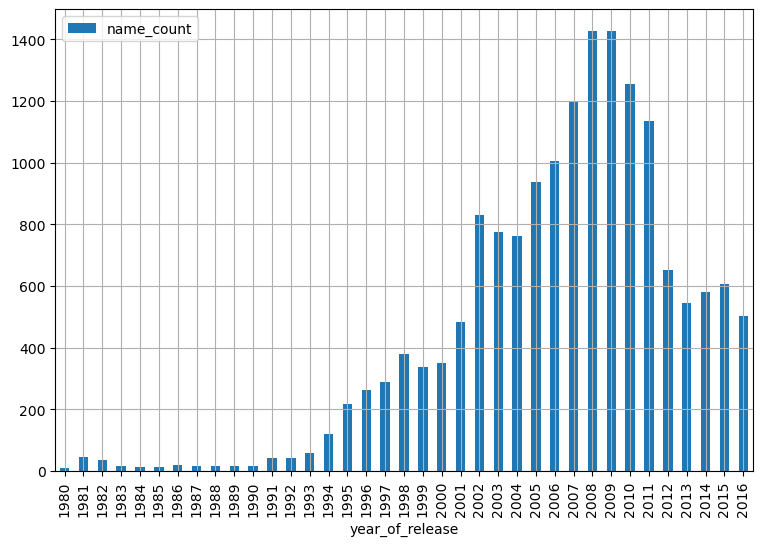

In [17]:
df_year_grouped = df.groupby('year_of_release').agg({'name':['count']})
df_year_grouped.columns = df_year_grouped.columns.map('_'.join)
df_year_grouped.plot(kind='bar', grid=True, figsize=(9, 6))

**Вывод**

**Для дальнейшего анализа и прогнозирования будут использоваться данные не ранее 2012 года**

Более ранние данные не представительны:
- в 1980-х и 1990-х годах игровая индустрия до массового распространения ПК и мобильных устройств выглядела совершенно иначе
- резкий рост в начале 2000-х обусловлен массовым распространением интернета, а пик этого роста пришелся на 2008-й год, затем после мирового финансового кризиса наблюдался спад. Повторный кратный рост представляется маловероятным.

### Продажи по платформам
</font><font color='Blue'>
**Цель**
- Определить 10 платформ с максимальными продажами
- Посмостреть для отдельных платформ динамику продаж по годам
- определить характерное "время жизни" платформы
- определить потенциально песпективные платформы

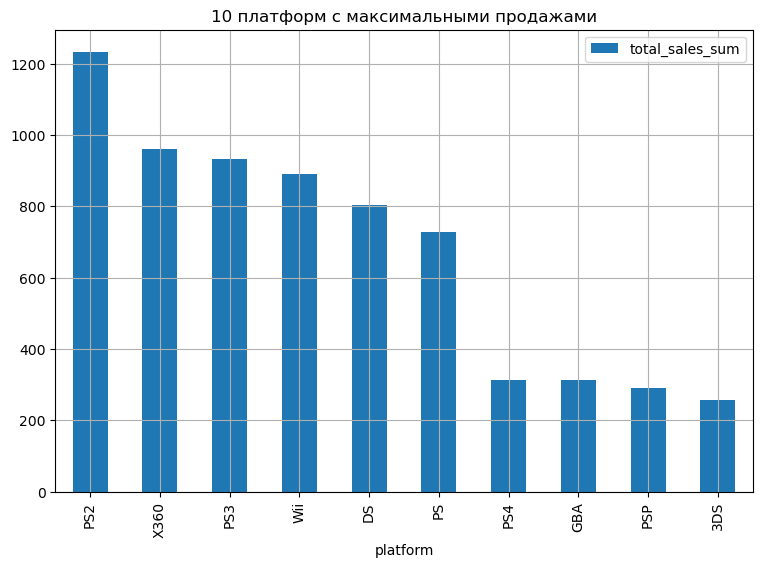

In [18]:
df_platform_grouped = df.groupby('platform').agg({'total_sales':['sum']})
df_platform_grouped.columns = df_platform_grouped.columns.map('_'.join)
df_platform_grouped = df_platform_grouped.sort_values(by='total_sales_sum', ascending=False).reset_index()
df_platform_grouped.loc[:9].plot(x='platform', y='total_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='10 платформ с максимальными продажами')
plt.show()


**Распределение продаж по годам для 10 платформ с максимальными продажами**

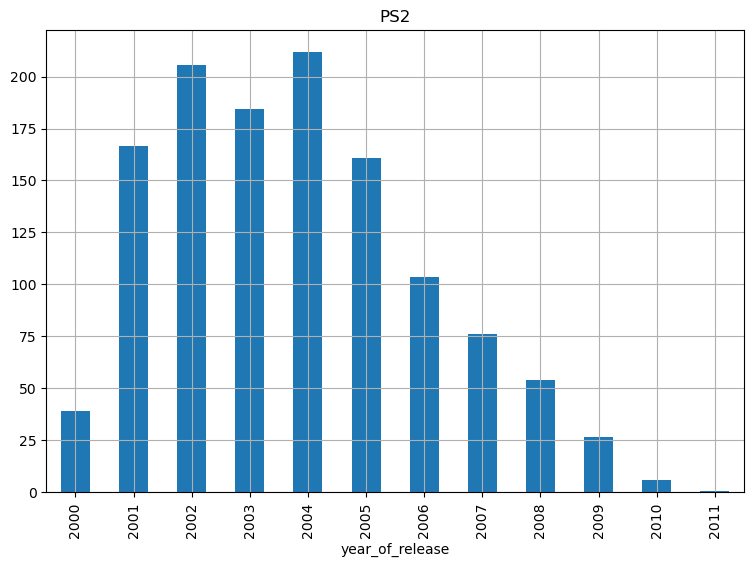

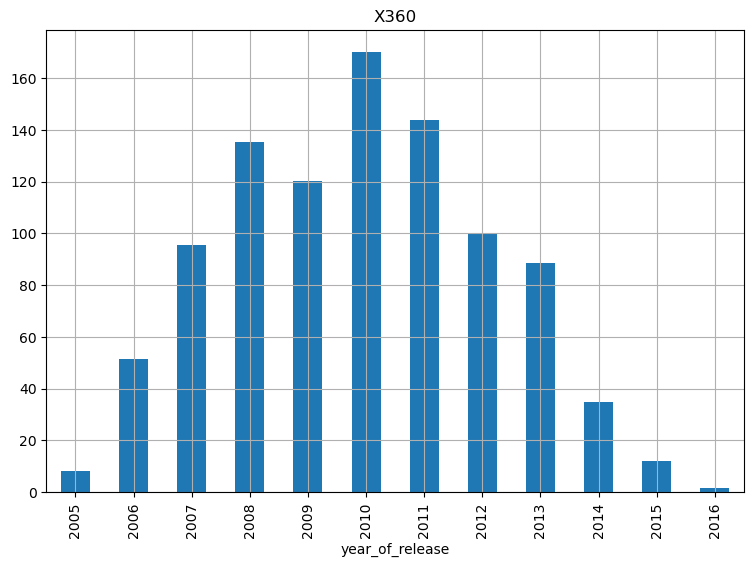

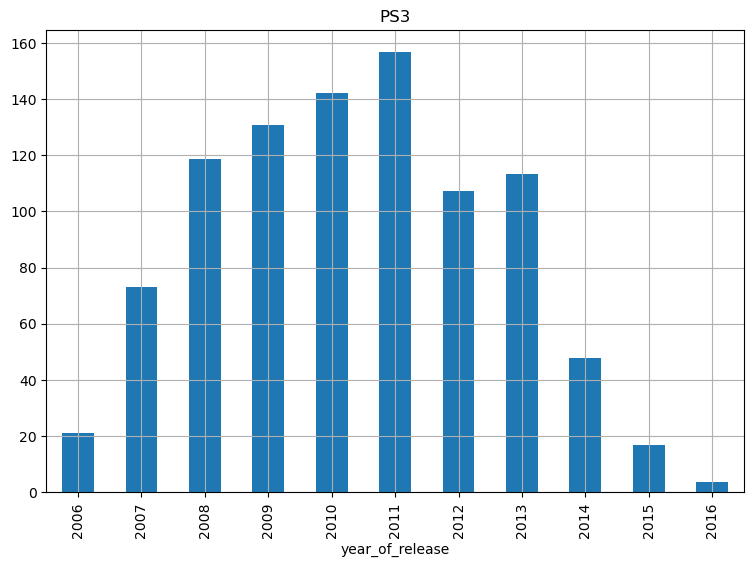

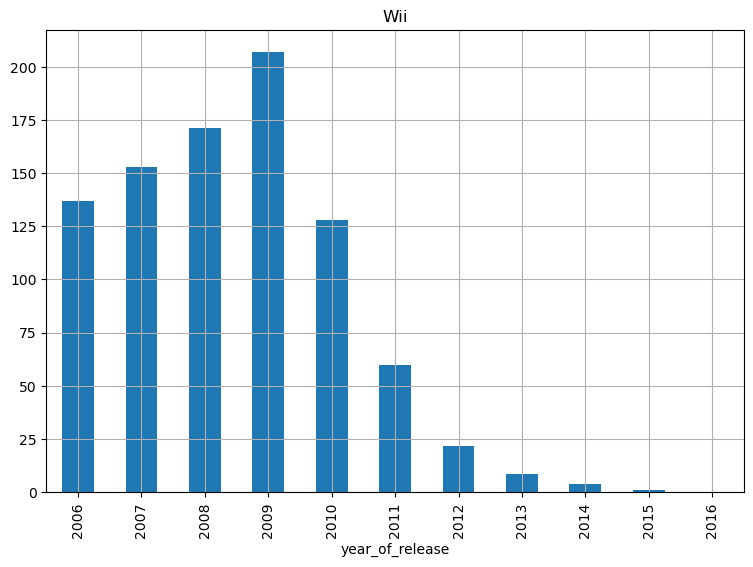

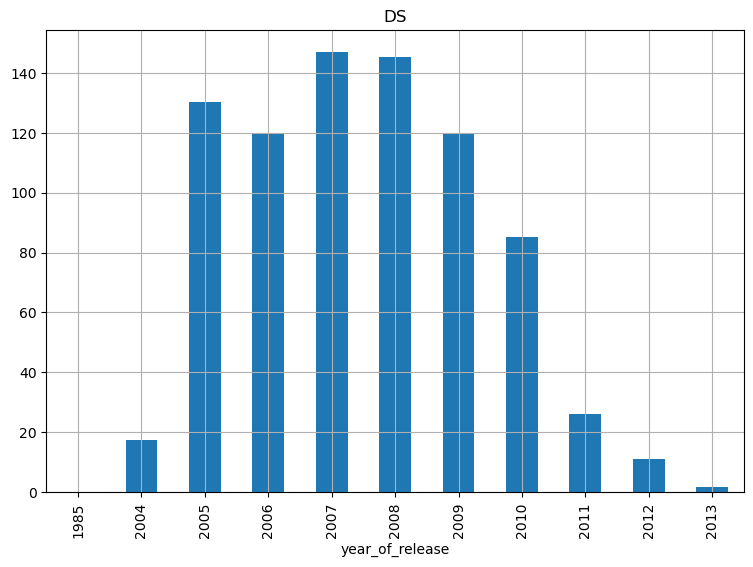

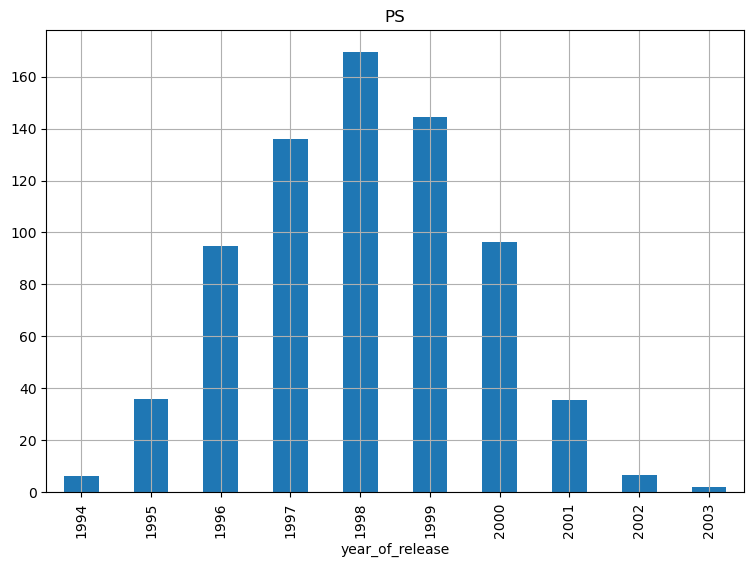

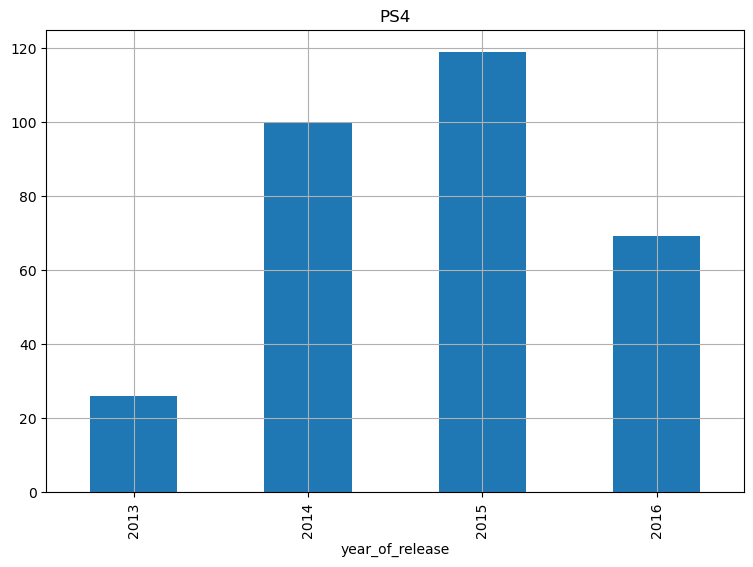

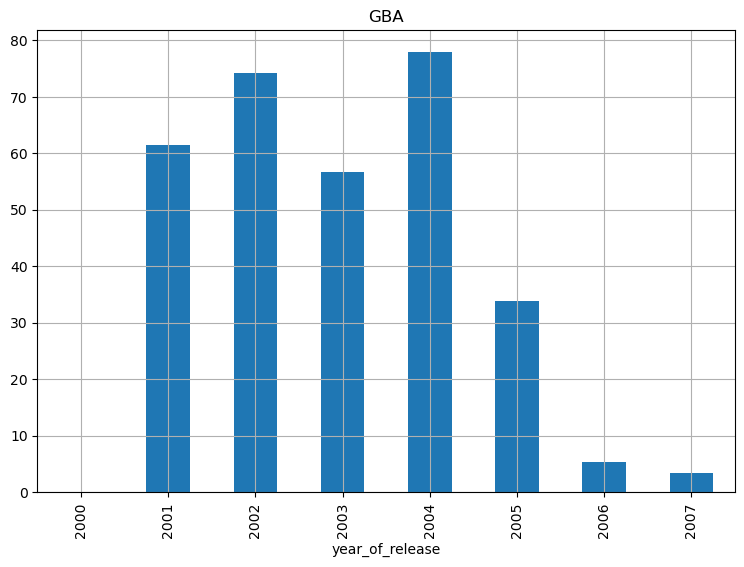

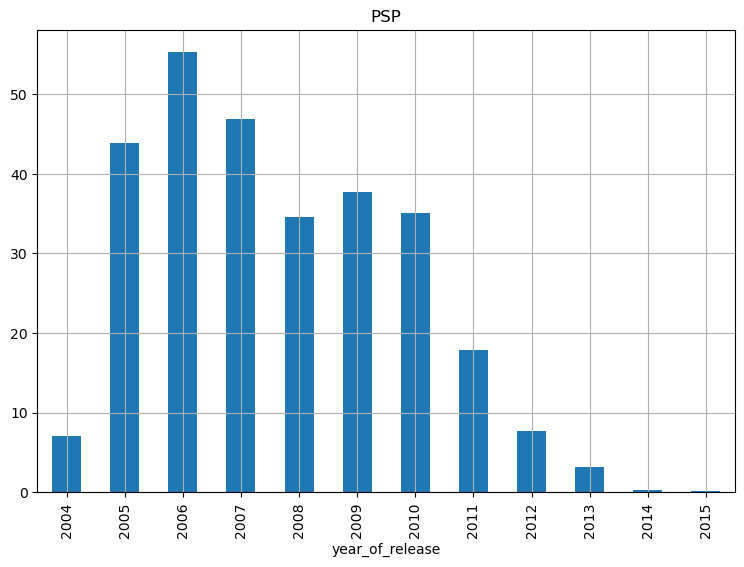

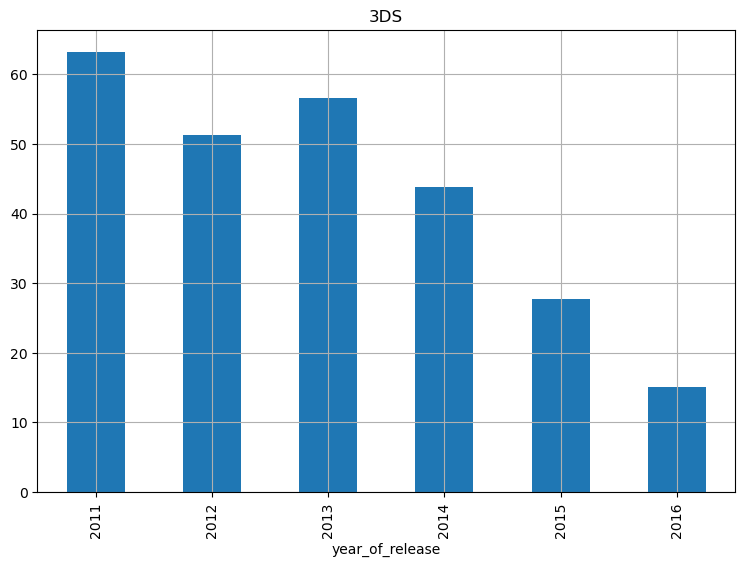

In [19]:
for pn in list(df_platform_grouped.loc[:9]['platform']):
    df.loc[df['platform'] == pn].groupby('year_of_release').agg({'total_sales': ['sum']})\
    .plot(kind='bar', grid=True, figsize=(9, 6), legend=False, title=pn).set_ylabel='total_sales'

У платформы DS явно какой-то артефакт в 1985 году. Посмотрим на него поближе.

In [20]:
df.loc[(df['platform'] == 'DS') & (df['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,other,0.02


</font><font color='Blue'>

Видно, что [игра явно](https://www.vgchartz.com/game/4399/strongest-tokyo-university-shogi-ds/) не из 1985 года.
Не буду с ней ничего делать, поскольку в актуальный набор данных она все равно не попадает

</font><font color='Blue'>

**Промежуточный вывод**

**Видно, что платформа появляется, через 1-3 года выходит на пик по продажам, держится на нем 5-6 лет, после чего становится снова непопулярной**

То есть потенциальный интерес представляют новые платформы, находящиеся либо в стадии роста, либо пережившие бурный рост 1-2 года назад.

**Рассмотрим данные для актуального периода (2012 год и позднее)**

In [21]:
df = df.loc[df['year_of_release'] >= 2012]

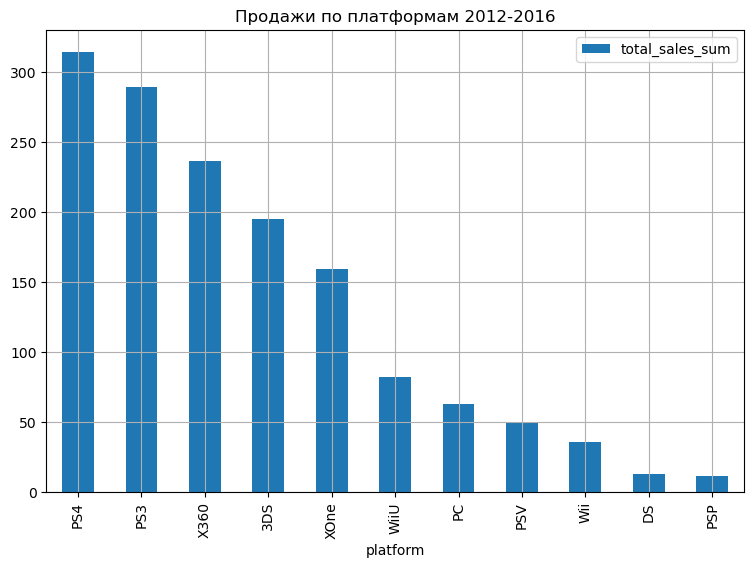

In [22]:
df_platform_grouped_12 = df.groupby('platform').agg({'total_sales':['sum']})
df_platform_grouped_12.columns = df_platform_grouped_12.columns.map('_'.join)
df_platform_grouped_12.sort_values(by='total_sales_sum', ascending=False).reset_index()\
.plot(x='platform', y='total_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
title='Продажи по платформам 2012-2016')
plt.show()

### Боксплот глобальных продаж с разбивкой по платформам
    
Цель - визуализировать характерные объемы продаж для различных платформ

<AxesSubplot: xlabel='total_sales', ylabel='platform'>

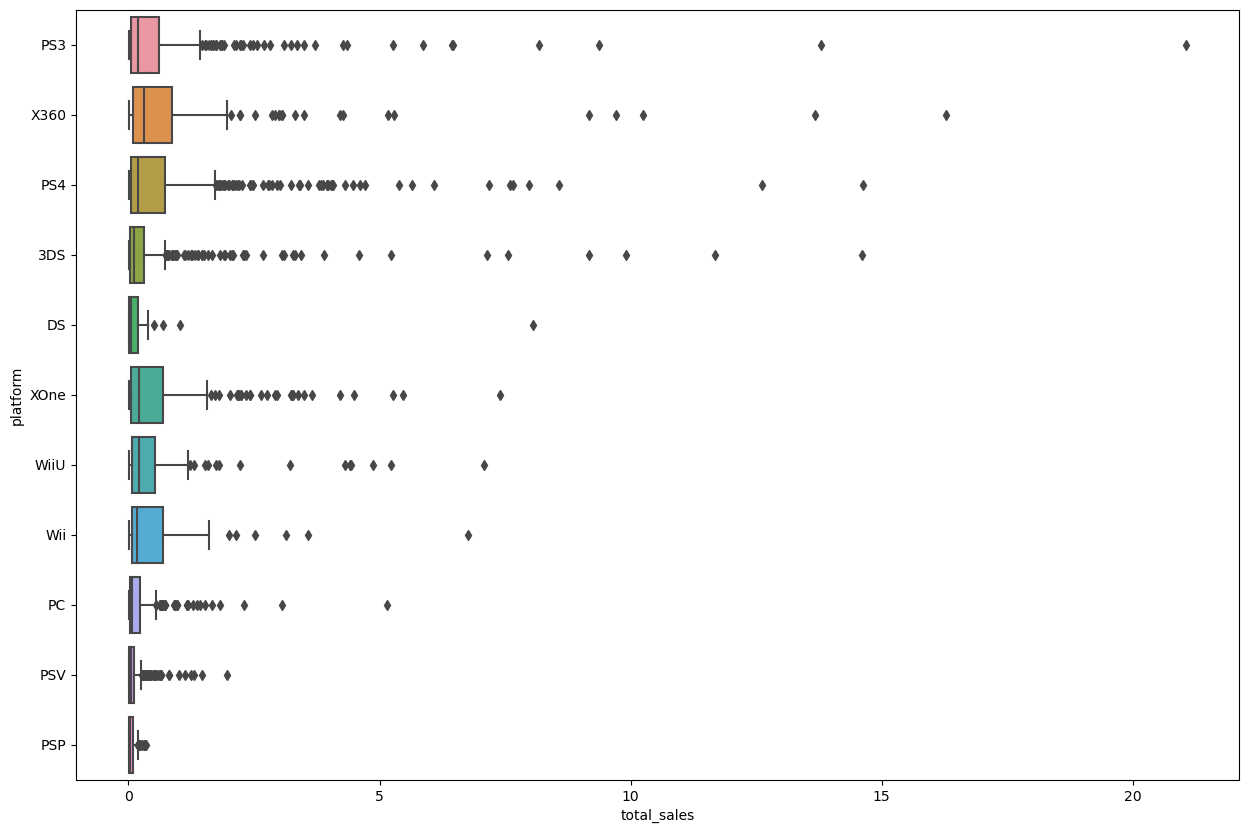

In [23]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="total_sales", y="platform")

(0.0, 2.0)

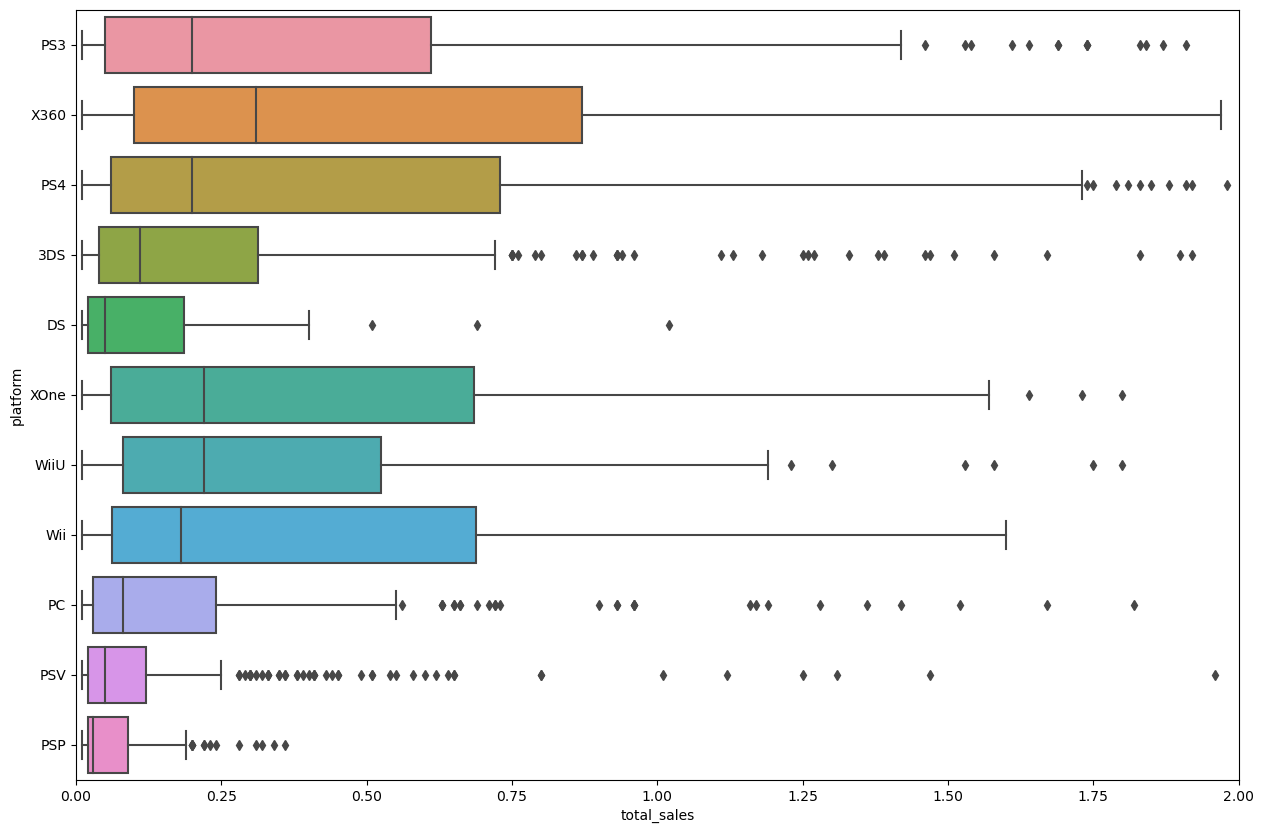

In [24]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="total_sales", y="platform").set_xlim([0,2.0])

**Промежуточный вывод**
- на рассматриваемом периоде времения явно выделяются платформы с максимальными объемами продаж - это крупные игроки типа X360, PS3, PS4, XOne
- платформы с минимальными продажами либо уже уходят в прошлое, что видно по разделу 2.1, либо это игроки локальных рынков типа DS и  3DS
- практически у всех платформ есть продукты, которые "выстреливают" и обеспечивают максимальные продажи

</font><font color='Blue'>
    
### Продажи по годам по платформам за период 2012-2016

**Цель**

Изучить динамику глобальных продаж за выбранный период (2012-2016), определить наиболее перспективные платформы

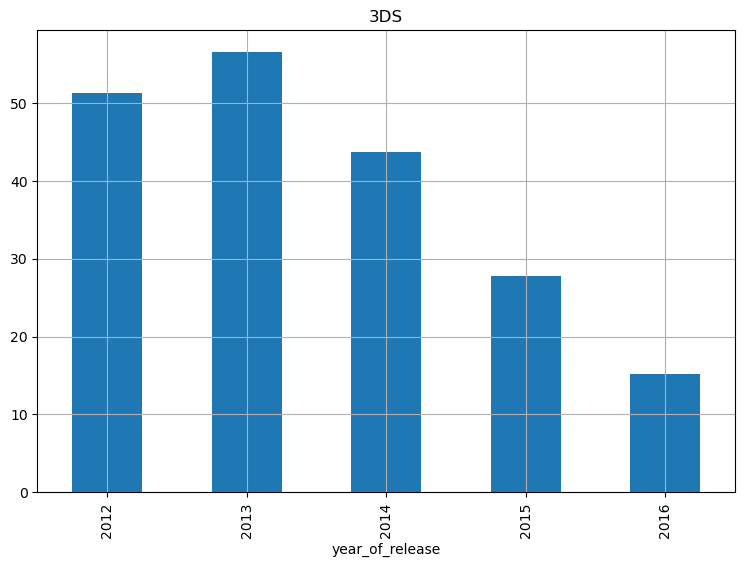

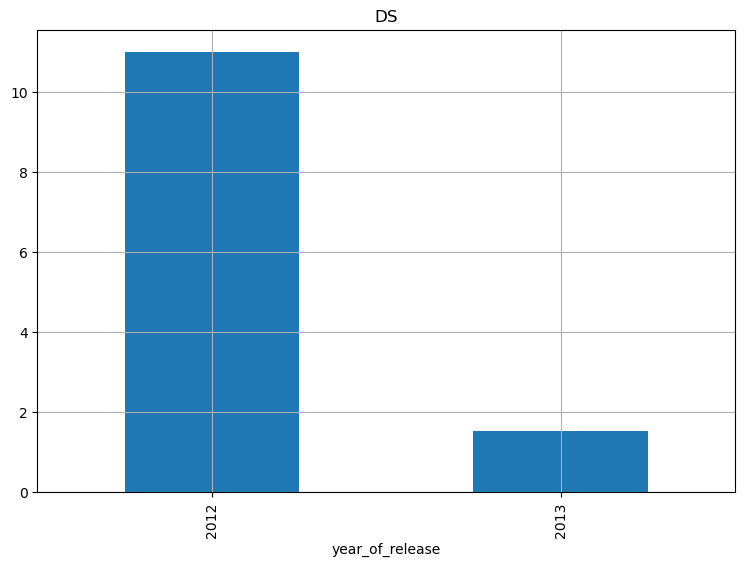

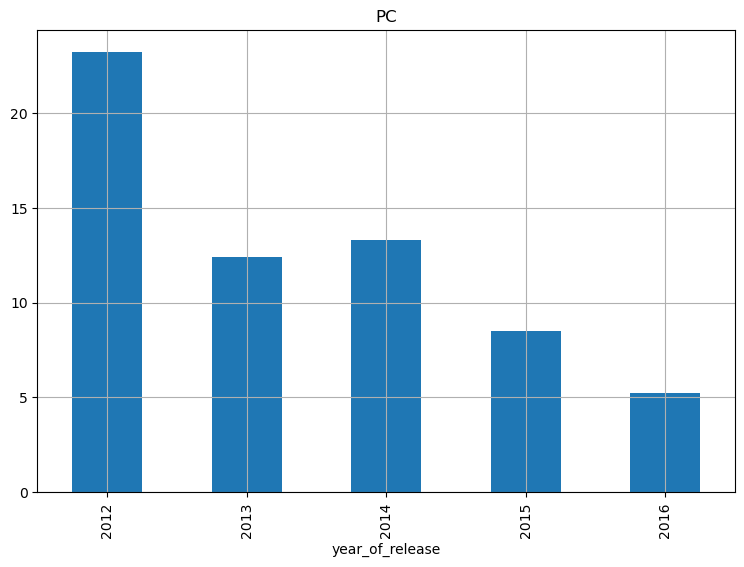

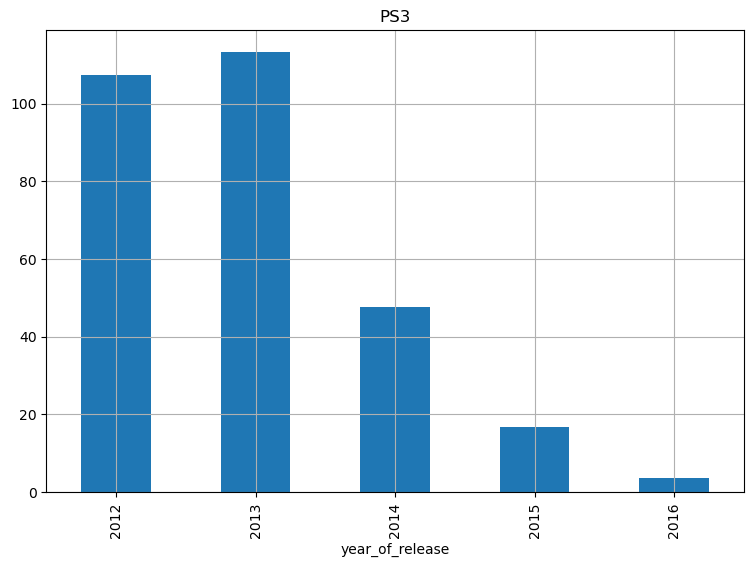

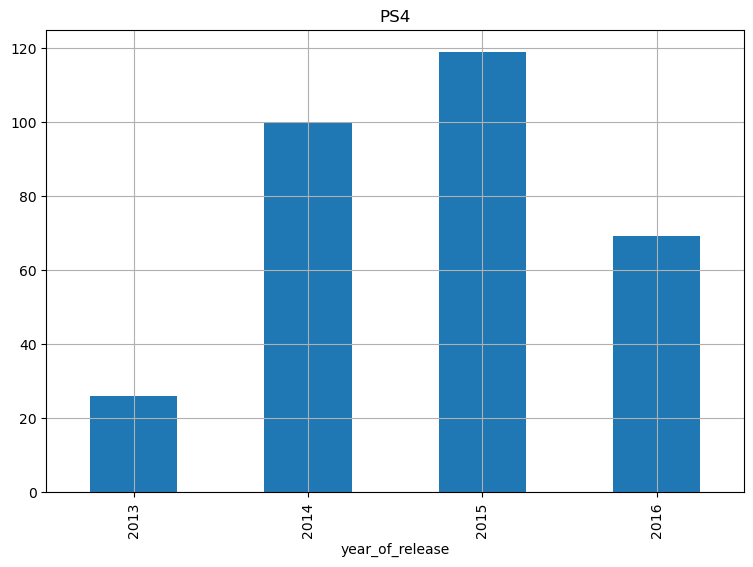

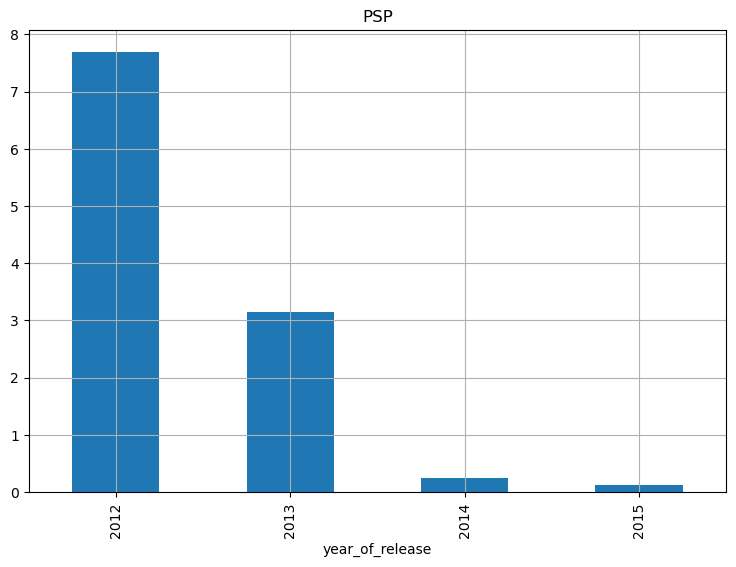

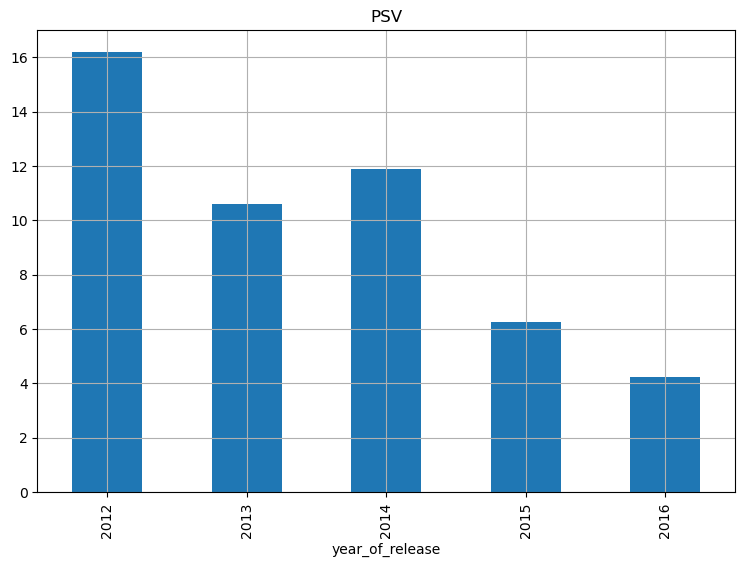

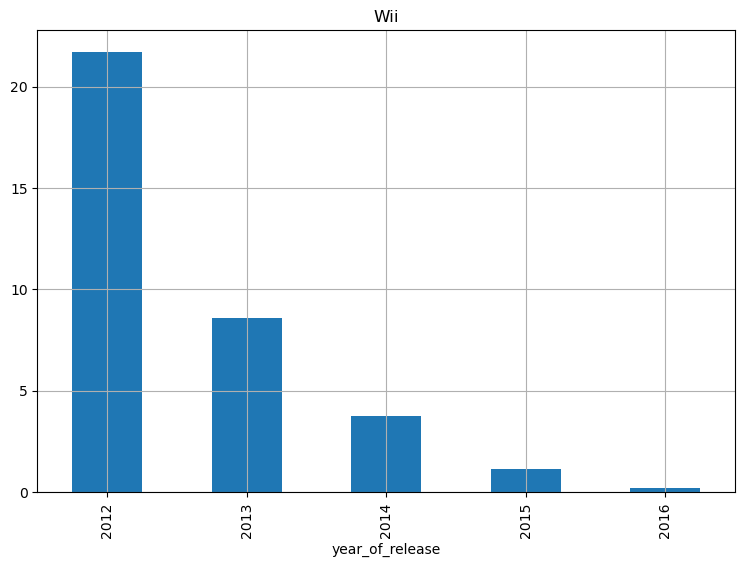

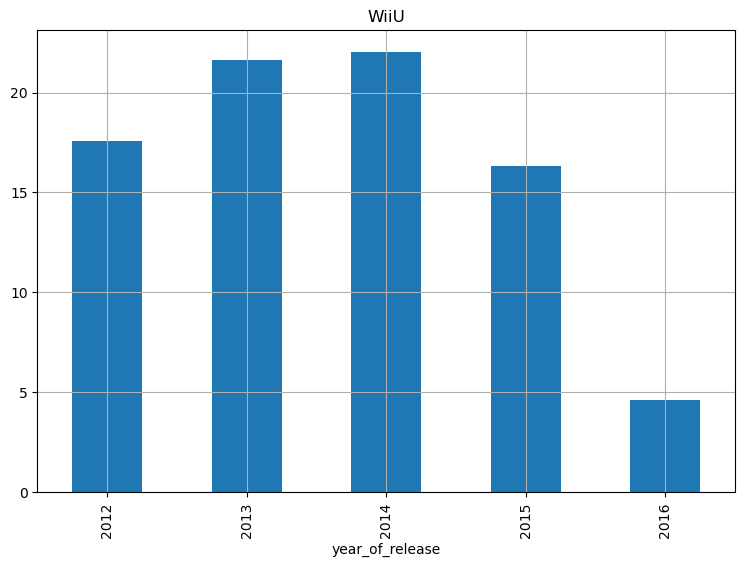

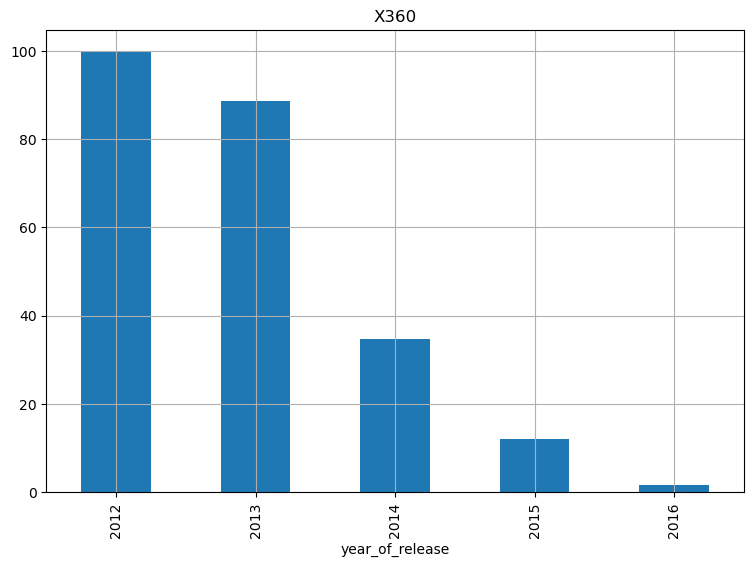

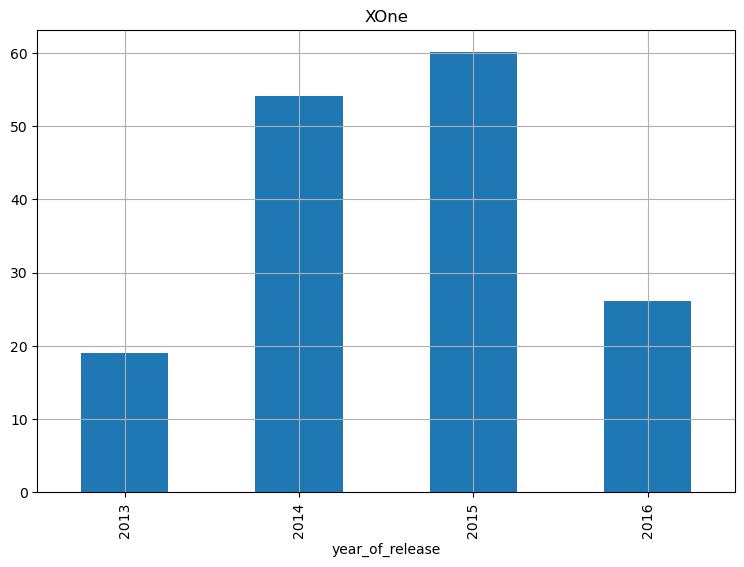

In [25]:
for pn in list(df_platform_grouped_12.index):
    df.loc[df['platform'] == pn].groupby('year_of_release').agg({'total_sales': ['sum']})\
    .plot(kind='bar', grid=True, figsize=(9, 6), legend=False, title=pn)

</font><font color='Blue'>

**Вывод по платформам**

- на всем рассматриваемом периоде в среднем платформа активно работает и приносит выручку 5-6 лет, затем уходит в небытие.
- на интересующем периоде с 2012 года и позже все довольно грустно. Ни одна из платформ не находится в стадии роста, все по продажам падают. Наиболее перспективными выглядят **PS4** и **XOne**. (Какая неожиданность)

</font><font color='Blue'>

### Продажи в зависимости от рейтинга

**Цель**

Исследовать наличие зависимости и ее количественные показатели (коэффициент корреляции) между продажами и оценками пользователей и критиков

</font><font color='Blue'>
    
Посмотрим, что осталось после установки заглушек, и какие платформы имеет смысл рассматривать дальше

In [26]:

print('Отзывы пользователей')
for pn in df['platform'].unique():
    print(pn, 'Осталось', len(df.loc[(df['user_score'] != -1) & (df['platform'] == pn)]), 'из', \
    len(df.loc[df['platform'] == pn]), 'строк')

print('\n','Отзывы критиков')
for pn in df['platform'].unique():
    print(pn, 'Осталось', len(df.loc[(df['critic_score'] != -1) & (df['platform'] == pn)]), 'из', \
    len(df.loc[df['platform'] == pn]), 'строк')

Отзывы пользователей
PS3 Осталось 283 из 493 строк
X360 Осталось 235 из 292 строк
PS4 Осталось 257 из 392 строк
3DS Осталось 114 из 396 строк
DS Осталось 3 из 31 строк
XOne Осталось 182 из 247 строк
WiiU Осталось 100 из 147 строк
Wii Осталось 17 из 54 строк
PC Осталось 206 из 250 строк
PSV Осталось 130 из 411 строк
PSP Осталось 4 из 173 строк

 Отзывы критиков
PS3 Осталось 214 из 493 строк
X360 Осталось 171 из 292 строк
PS4 Осталось 252 из 392 строк
3DS Осталось 104 из 396 строк
DS Осталось 1 из 31 строк
XOne Осталось 169 из 247 строк
WiiU Осталось 90 из 147 строк
Wii Осталось 5 из 54 строк
PC Осталось 198 из 250 строк
PSV Осталось 107 из 411 строк
PSP Осталось 1 из 173 строк


</font><font color='Blue'>
    
Платформы, для которых будет исследоваться корреляция продаж и отзывов:
- PS3
- X360
- PS4
- 3DS
- XOne
- WiiU
- PC
- PSV

Коэффициент корреляции продаж и рейтинга пользователей для платформы PS3 -  -0.005143522887113816


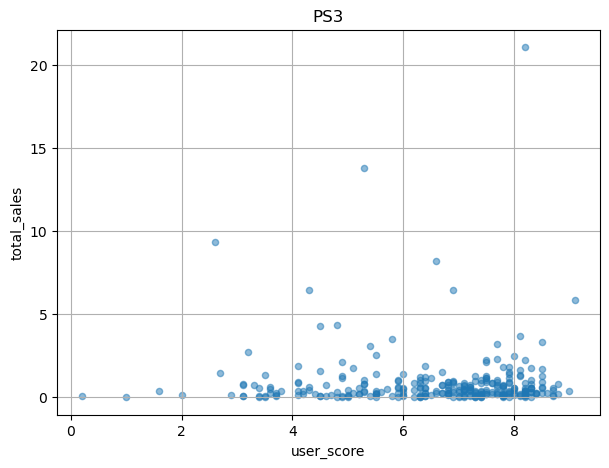

Коэффициент корреляции продаж и рейтинга пользователей для платформы X360 -  0.0061639786462133256


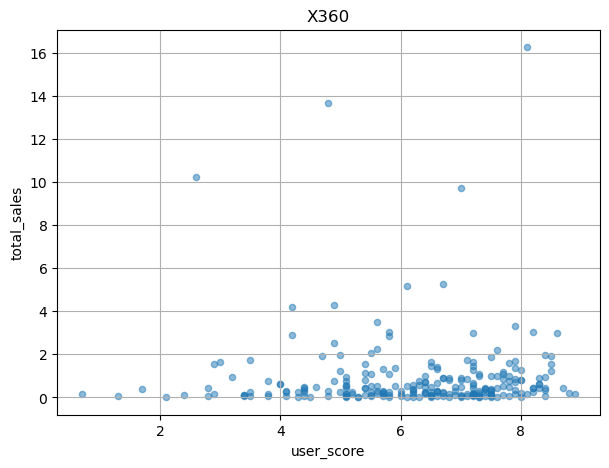

Коэффициент корреляции продаж и рейтинга пользователей для платформы PS4 -  -0.031957110204556424


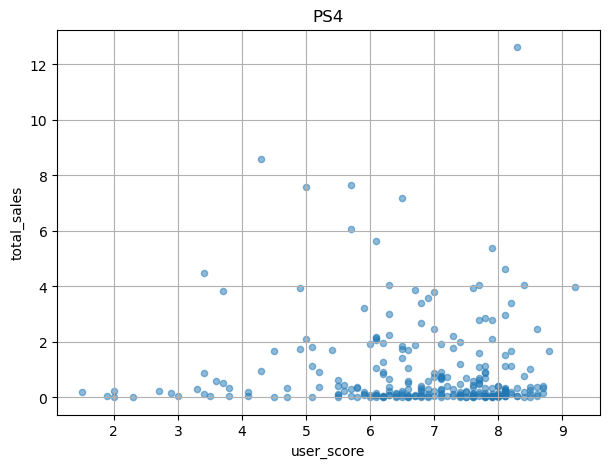

Коэффициент корреляции продаж и рейтинга пользователей для платформы 3DS -  0.19758263411038596


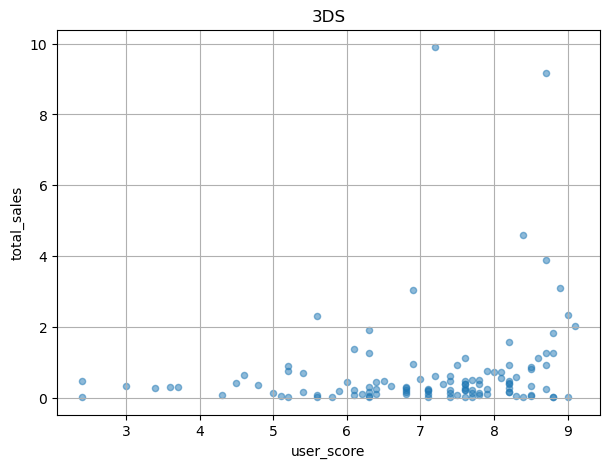

Коэффициент корреляции продаж и рейтинга пользователей для платформы XOne -  -0.06892505328279412


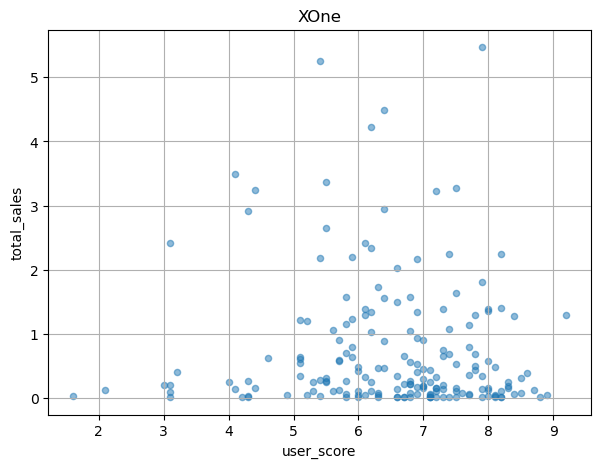

Коэффициент корреляции продаж и рейтинга пользователей для платформы WiiU -  0.4002190202148617


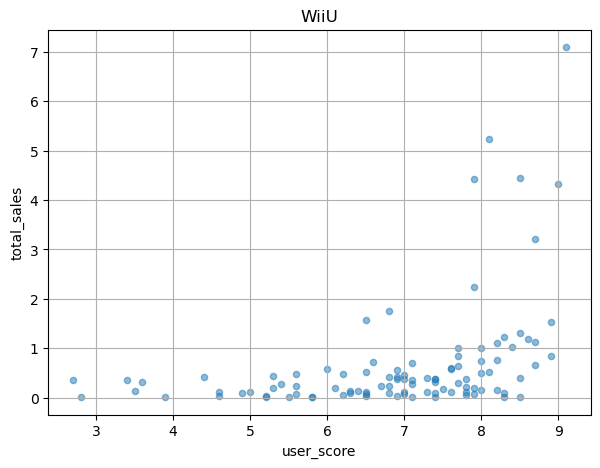

Коэффициент корреляции продаж и рейтинга пользователей для платформы PC -  -0.12186747630735577


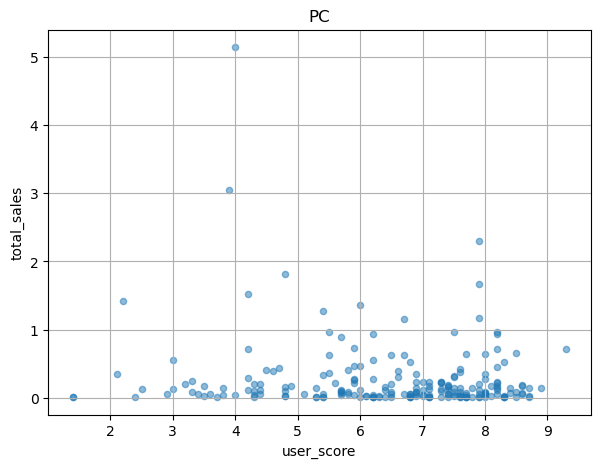

Коэффициент корреляции продаж и рейтинга пользователей для платформы PSV -  -0.004339437514314869


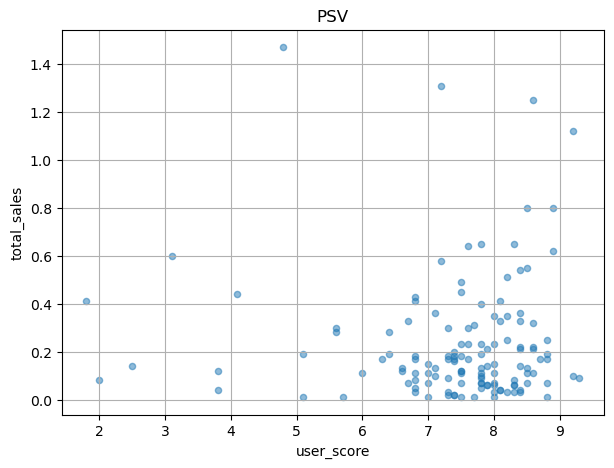

In [27]:
platform_score_list = ['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'PC', 'PSV']

for pn in platform_score_list:
    df.loc[(df['platform'] == pn) & (df['user_score'] != -1)].plot(figsize=(7, 5), x='user_score', y='total_sales', kind='scatter', grid=True, alpha=.5,\
                                     title=pn)
    c = df.loc[(df['platform'] == pn) & (df['user_score'] != -1)]['total_sales'].\
    corr(df.loc[(df['platform'] == pn) & (df['user_score'] != -1)]['user_score'])
    print(f'Коэффициент корреляции продаж и рейтинга пользователей для платформы {pn} -  {c}')
    plt.show()

Коэффициент корреляции продаж и рейтинга критиков для платформы PS3 -  0.3314972592629587


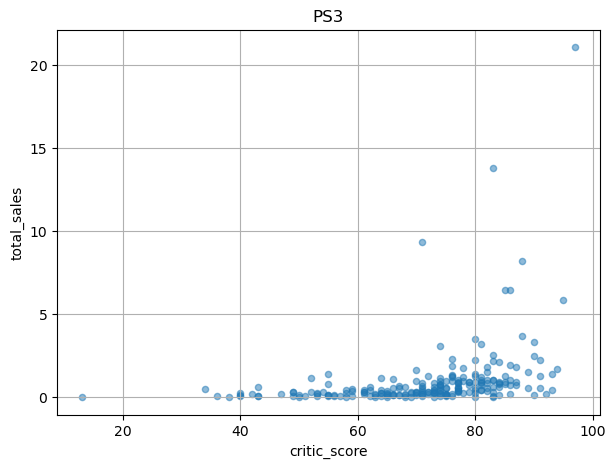

Коэффициент корреляции продаж и рейтинга критиков для платформы X360 -  0.36057348885073365


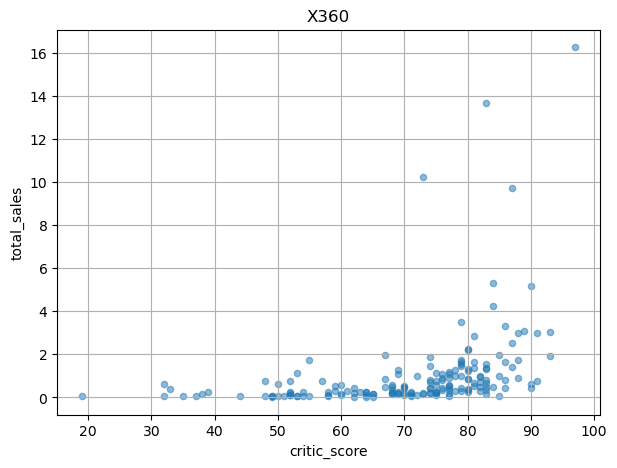

Коэффициент корреляции продаж и рейтинга критиков для платформы PS4 -  0.406567902061781


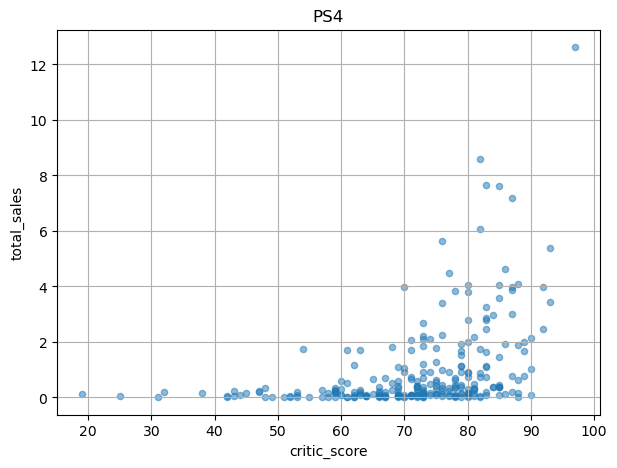

Коэффициент корреляции продаж и рейтинга критиков для платформы 3DS -  0.32080286953607845


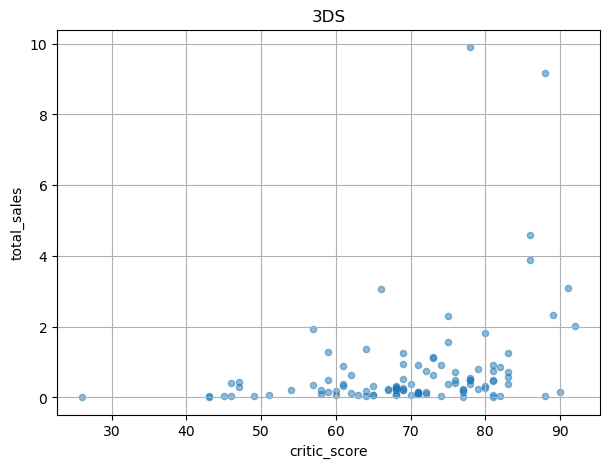

Коэффициент корреляции продаж и рейтинга критиков для платформы XOne -  0.41699832800840175


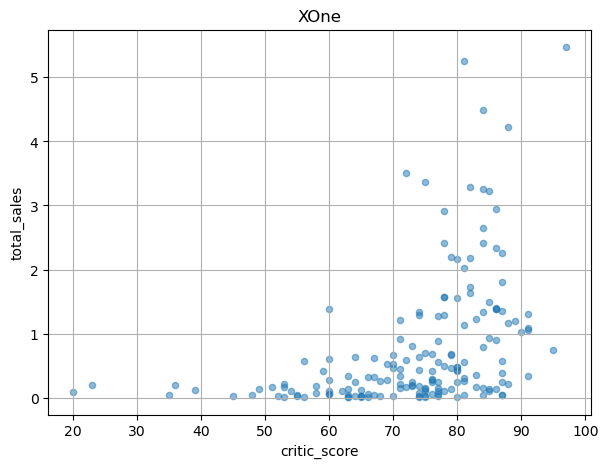

Коэффициент корреляции продаж и рейтинга критиков для платформы WiiU -  0.3483797601201749


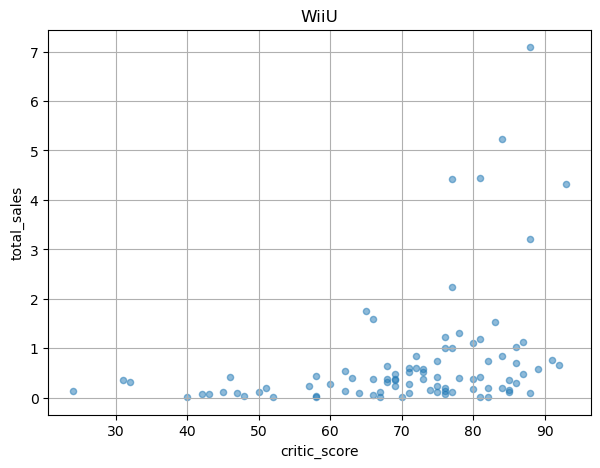

Коэффициент корреляции продаж и рейтинга критиков для платформы PC -  0.23724324311567918


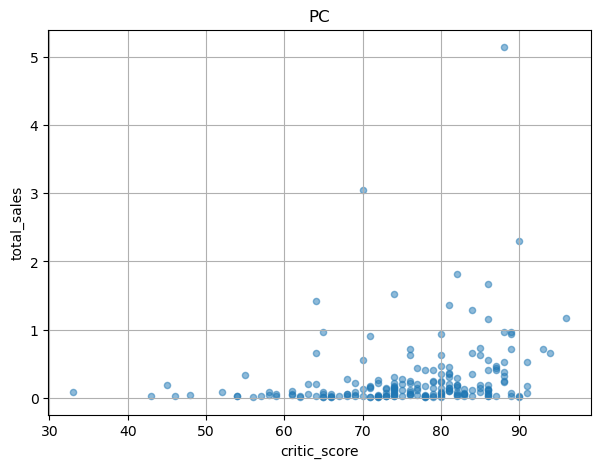

Коэффициент корреляции продаж и рейтинга критиков для платформы PSV -  0.09448789929316172


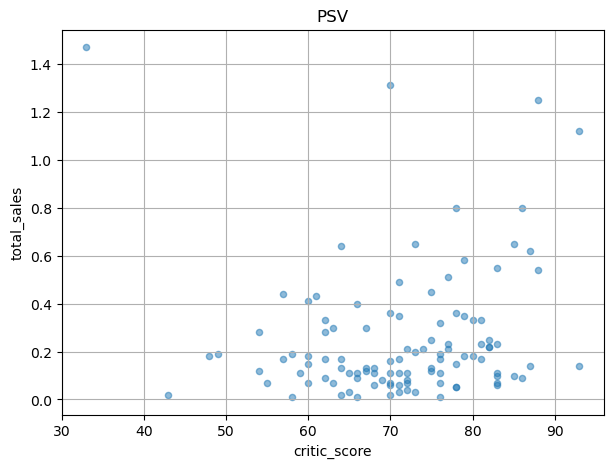

In [28]:
for pn in platform_score_list:
    df.loc[(df['platform'] == pn) & (df['critic_score'] != -1)].plot(figsize=(7, 5), x='critic_score', y='total_sales', kind='scatter', grid=True, alpha=.5,\
                                     title=pn)
    c = df.loc[(df['platform'] == pn) & (df['critic_score'] != -1)]['total_sales'].\
    corr(df.loc[(df['platform'] == pn) & (df['critic_score'] != -1)]['critic_score'])
    print(f'Коэффициент корреляции продаж и рейтинга критиков для платформы {pn} -  {c}')
    plt.show()

</font><font color='Blue'>

**Вывод**
    
- корреляции между пользовательским рейтингом и продажами практически нет (кроме платформы WiiU, для которой, наличие положительной корреляции 0,4 вероятно, объясняется наличием отдельных игр, которые и хорошо продавались, и понравились пользователям)
- Для рейтинга критиков корреляция между продажами и оценкой критика положительная, поскольку критик оценивает игру более объективно, чем пользователь и скорее всего не поставит плохую оценку игре из-за технических проблем. Околонулевая корреляция для платформы PSV вероятно объясняется выбросом (левый верхний угол графика). Посмотрим, что это за игра, которая хорошо продавалась, но пользователям не понравилась

In [29]:
df.loc[(df['platform'] == 'PSV') & (df['critic_score'] != -1)].sort_values(by='total_sales', ascending=False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1294,Call of Duty Black Ops: Declassified,PSV,2012,Action,0.71,0.43,0.07,0.26,33.0,4.8,M,1.47
1485,Assassin's Creed III: Liberation,PSV,2012,Action,0.53,0.48,0.06,0.24,70.0,7.2,M,1.31
1595,LittleBigPlanet PS Vita,PSV,2012,Platform,0.35,0.61,0.02,0.27,88.0,8.6,E,1.25
1831,Persona 4: Golden,PSV,2012,Role-Playing,0.36,0.23,0.38,0.15,93.0,9.2,M,1.12
2566,Killzone: Mercenary,PSV,2013,Shooter,0.20,0.39,0.04,0.17,78.0,8.9,M,0.80


</font><font color='Blue'>

Понятно. Это единственная игра серии для платформы PSV. Продавалась хорошо из-за известности всей серии игр. Но, судя по всему, оказалась [неудачной](https://ru.wikipedia.org/wiki/Call_of_Duty:_Black_Ops:_Declassified)

</font><font color='Blue'>

### Продажи в зависимости от жанра

    
    
**Цель**

Исследовать зависимость продаж от жанров

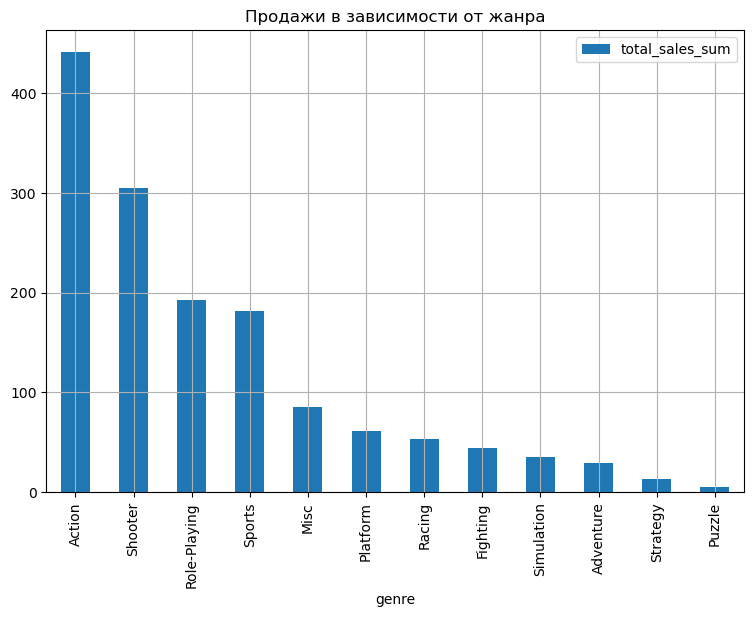

In [30]:
df_genre_grouped = df.groupby('genre').agg({'total_sales':['sum']})
df_genre_grouped.columns = df_genre_grouped.columns.map('_'.join)
df_genre_grouped = df_genre_grouped.sort_values(by='total_sales_sum', ascending=False).reset_index()
df_genre_grouped.plot(x='genre', y='total_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от жанра')
plt.show()

(0.0, 4.0)

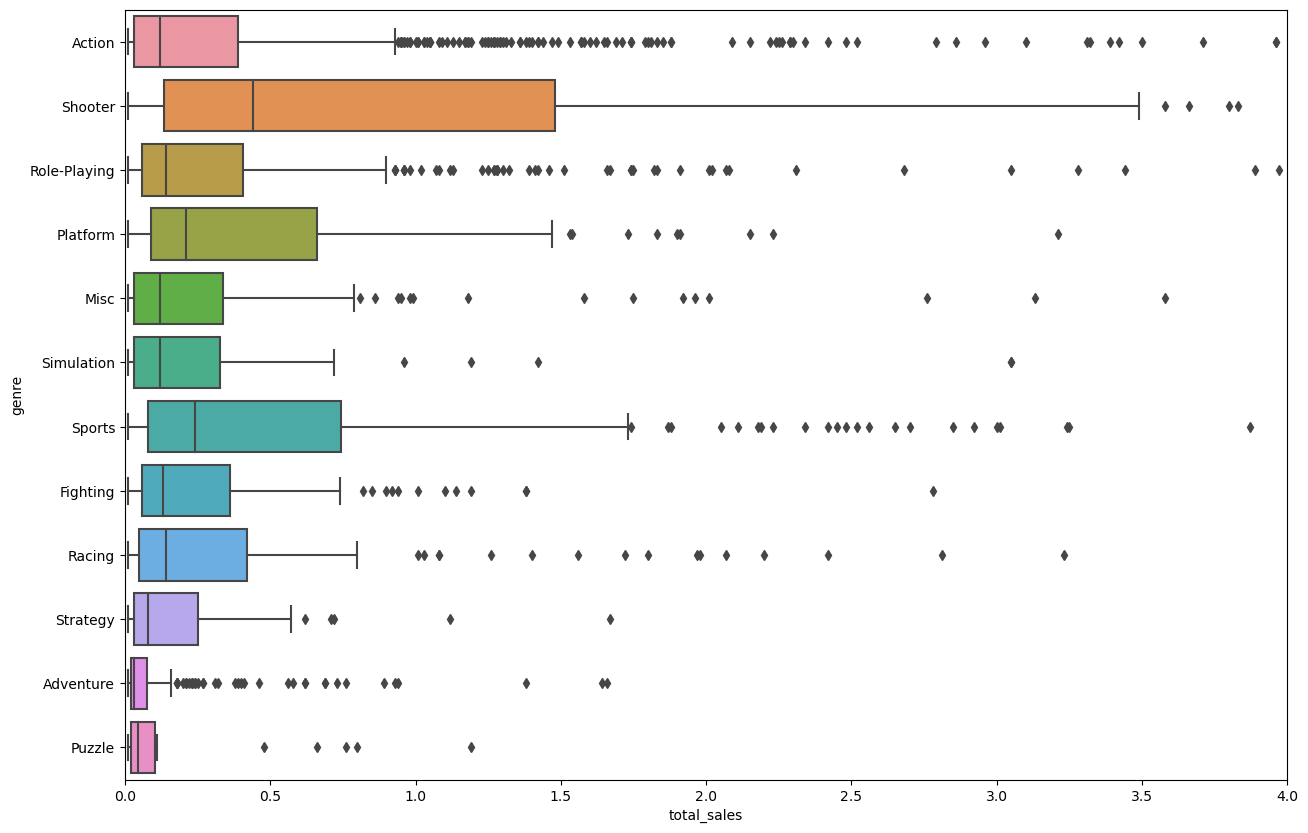

In [31]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x="total_sales", y="genre").set_xlim(0,4)

</font><font color='Blue'>

**Вывод**
    
Максимальные медианные продажи у жанров shooter, platform, sports

## Портрет пользователя в зависимости от региона

</font><font color='Blue'>
    
**Цель**

Определить для пользователя каждого региона:
- Самые популярные платформы
- Самые популярные жанры
- Влияение рейтинга ESRB на продажи

In [32]:
df_na = df.loc[(df['na_sales'] != 0)]
df_eu = df.loc[(df['eu_sales'] != 0)]
df_jp = df.loc[(df['jp_sales'] != 0)]

In [33]:
a, b, = df_na.na_sales.sum(), df.na_sales.sum()
print('df_na', a, b, round((b-a)/b*100, 2))
a, b, = df_eu.eu_sales.sum(), df.eu_sales.sum()
print('df_eu', a, b, round((b-a)/b*100, 2))
a, b, = df_jp.jp_sales.sum(), df.jp_sales.sum()
print('df_jp', a, b, round((b-a)/b*100, 2))

df_na 590.97 590.97 0.0
df_eu 506.82 506.82000000000005 0.0
df_jp 192.57999999999998 192.58 0.0


### Северная Америка

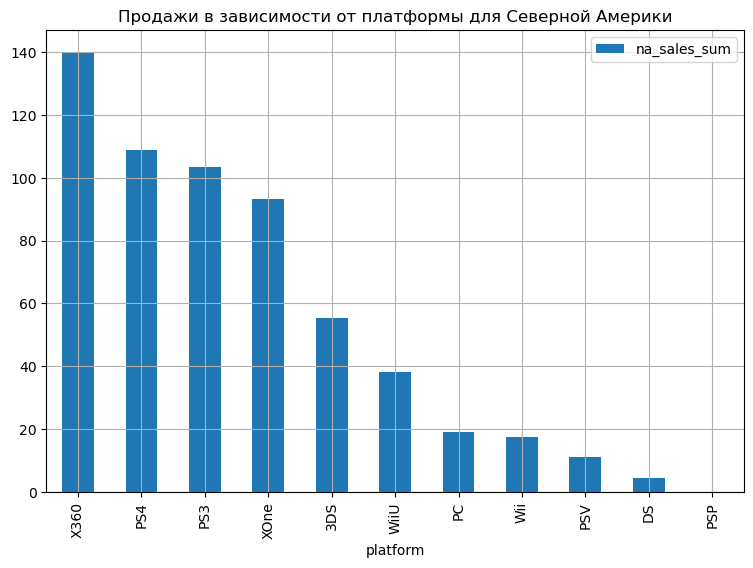

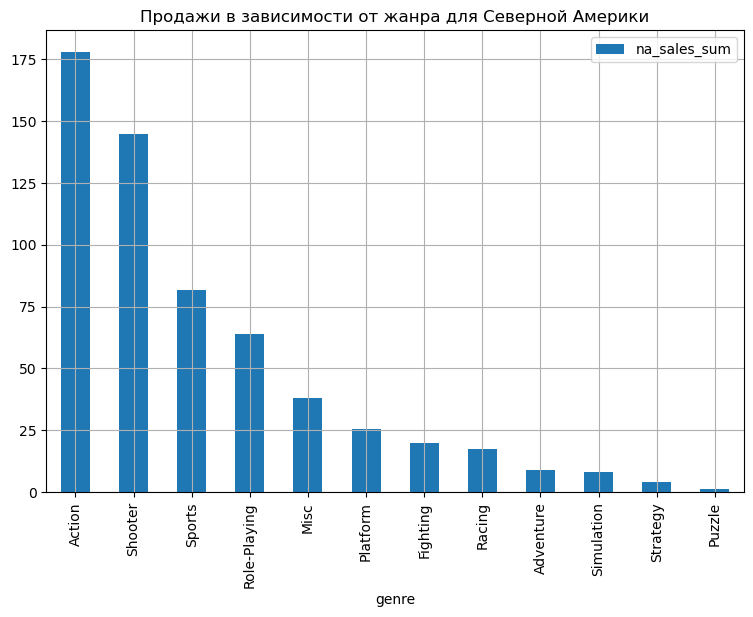

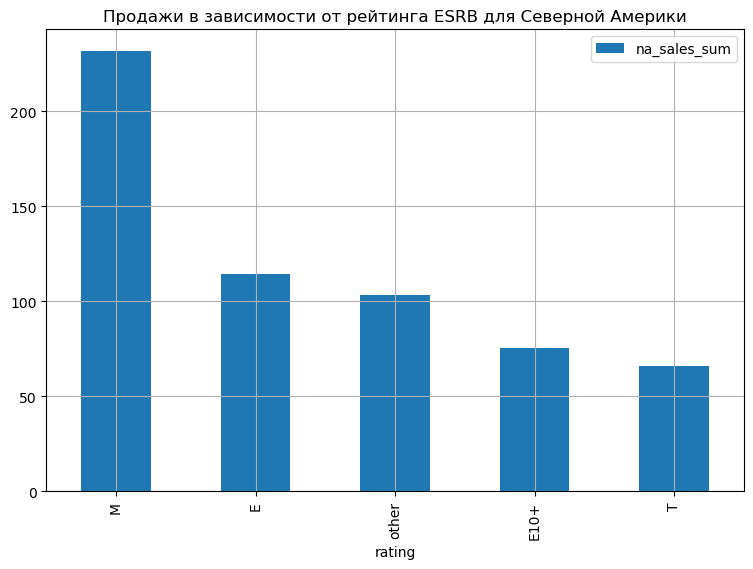

In [34]:
df_na_p = df_na.groupby('platform').agg({'na_sales':['sum']})
df_na_p.columns = df_na_p.columns.map('_'.join)
df_na_p = df_na_p.sort_values(by='na_sales_sum', ascending=False).reset_index()
df_na_p.plot(x='platform', y='na_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от платформы для Северной Америки')

plt.show()

df_na_g = df_na.groupby('genre').agg({'na_sales':['sum']})
df_na_g.columns = df_na_g.columns.map('_'.join)
df_na_g = df_na_g.sort_values(by='na_sales_sum', ascending=False).reset_index()
df_na_g.plot(x='genre', y='na_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от жанра для Северной Америки')

plt.show()

df_na_r = df_na.groupby('rating').agg({'na_sales':['sum']})
df_na_r.columns = df_na_r.columns.map('_'.join)
df_na_r = df_na_r.sort_values(by='na_sales_sum', ascending=False).reset_index()
df_na_r.plot(x='rating', y='na_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от рейтинга ESRB для Северной Америки')

plt.show()

### Европа

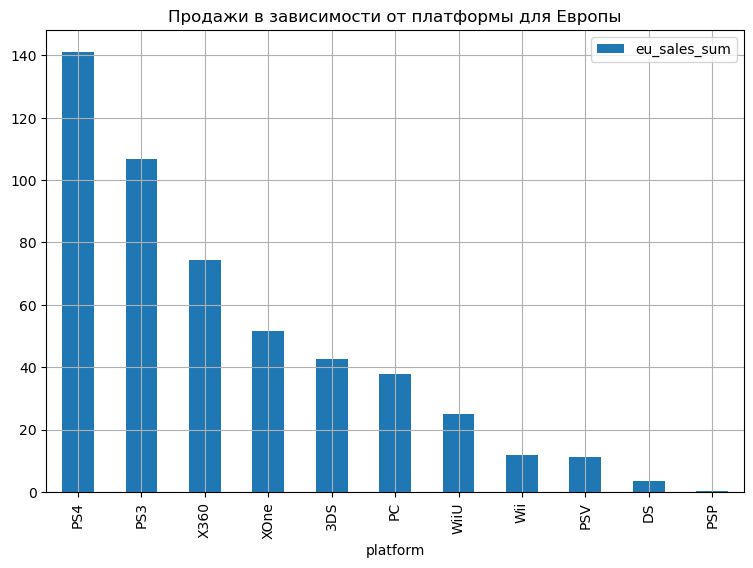

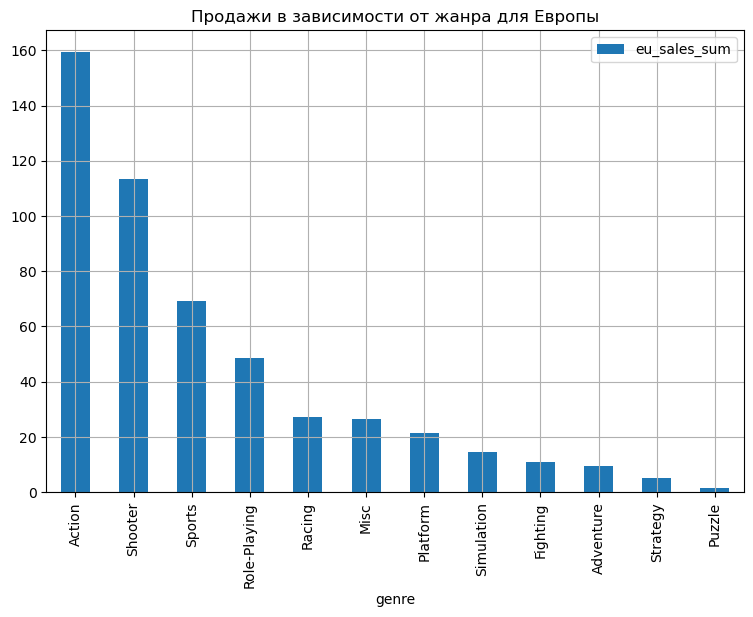

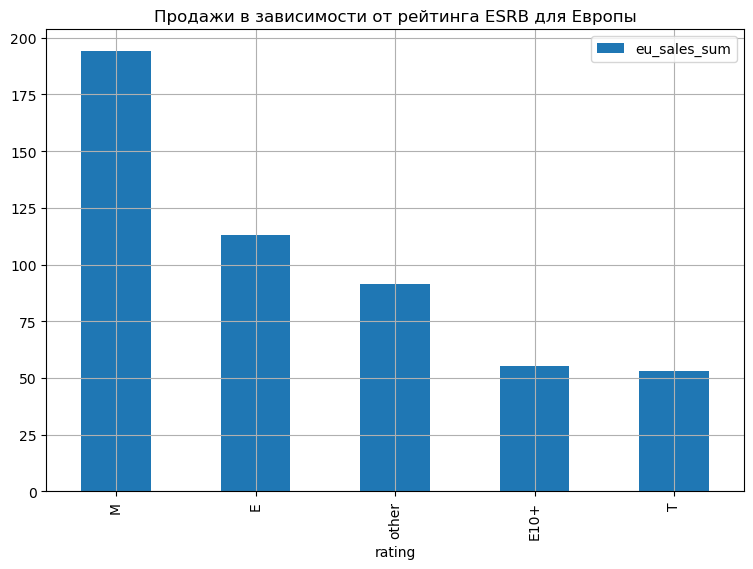

In [35]:
df_eu_p = df_eu.groupby('platform').agg({'eu_sales':['sum']})
df_eu_p.columns = df_eu_p.columns.map('_'.join)
df_eu_p = df_eu_p.sort_values(by='eu_sales_sum', ascending=False).reset_index()
df_eu_p.plot(x='platform', y='eu_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от платформы для Европы')

plt.show()

df_eu_g = df_eu.groupby('genre').agg({'eu_sales':['sum']})
df_eu_g.columns = df_eu_g.columns.map('_'.join)
df_eu_g = df_eu_g.sort_values(by='eu_sales_sum', ascending=False).reset_index()
df_eu_g.plot(x='genre', y='eu_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от жанра для Европы')

plt.show()

df_eu_r = df_eu.groupby('rating').agg({'eu_sales':['sum']})
df_eu_r.columns = df_eu_r.columns.map('_'.join)
df_eu_r = df_eu_r.sort_values(by='eu_sales_sum', ascending=False).reset_index()
df_eu_r.plot(x='rating', y='eu_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от рейтинга ESRB для Европы')

plt.show()

### Япония

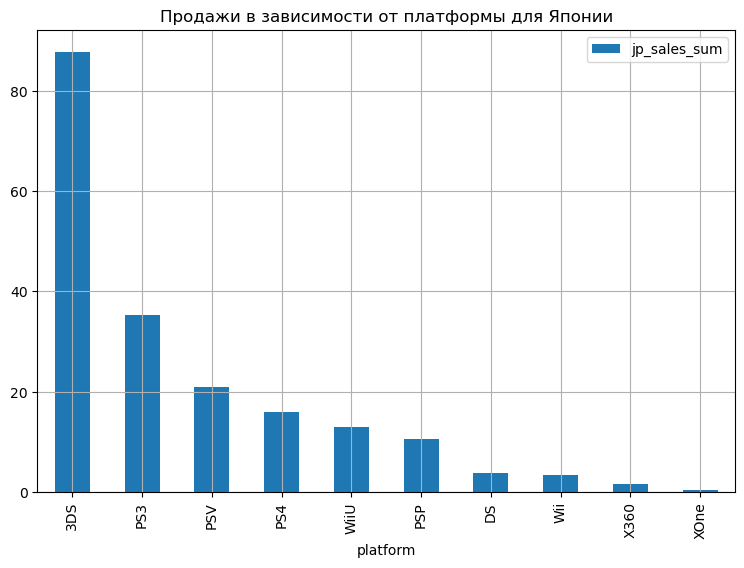

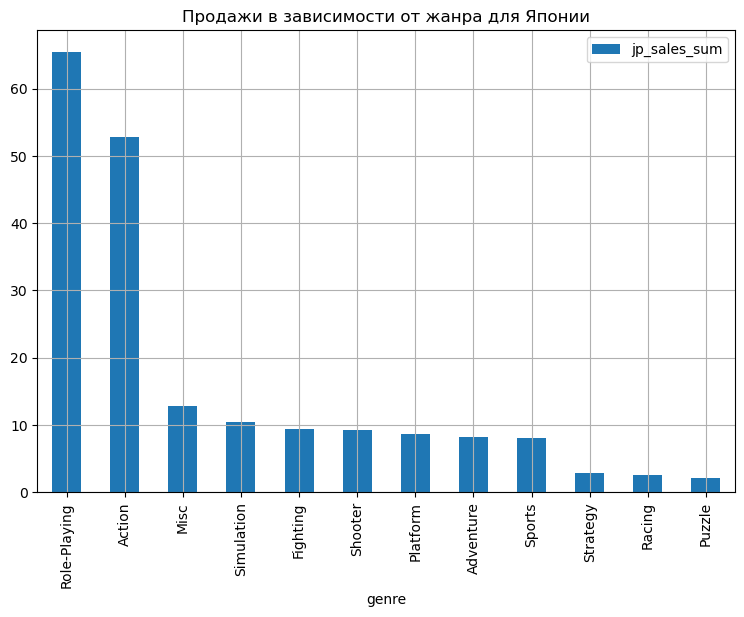

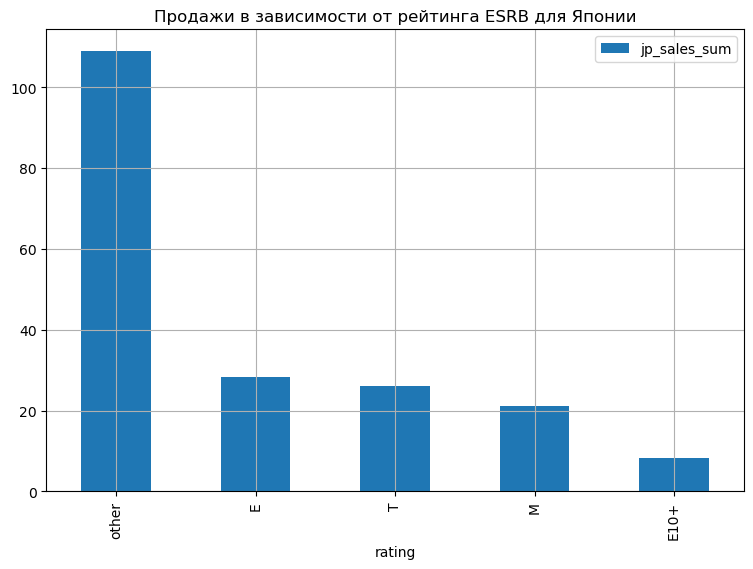

In [36]:
df_jp_p = df_jp.groupby('platform').agg({'jp_sales':['sum']})
df_jp_p.columns = df_jp_p.columns.map('_'.join)
df_jp_p = df_jp_p.sort_values(by='jp_sales_sum', ascending=False).reset_index()
df_jp_p.plot(x='platform', y='jp_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от платформы для Японии')

plt.show()

df_jp_g = df_jp.groupby('genre').agg({'jp_sales':['sum']})
df_jp_g.columns = df_jp_g.columns.map('_'.join)
df_jp_g = df_jp_g.sort_values(by='jp_sales_sum', ascending=False).reset_index()
df_jp_g.plot(x='genre', y='jp_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от жанра для Японии')

plt.show()

df_jp_r = df_jp.groupby('rating').agg({'jp_sales':['sum']})
df_jp_r.columns = df_jp_r.columns.map('_'.join)
df_jp_r = df_jp_r.sort_values(by='jp_sales_sum', ascending=False).reset_index()
df_jp_r.plot(x='rating', y='jp_sales_sum', kind='bar', grid=True, figsize=(9, 6), \
    title='Продажи в зависимости от рейтинга ESRB для Японии')

plt.show()

</font><font color='Blue'>
### Анализ для топ-5 платформ и жанров

Text(0.5, 1.0, 'Топ-5 жанров в Японии')

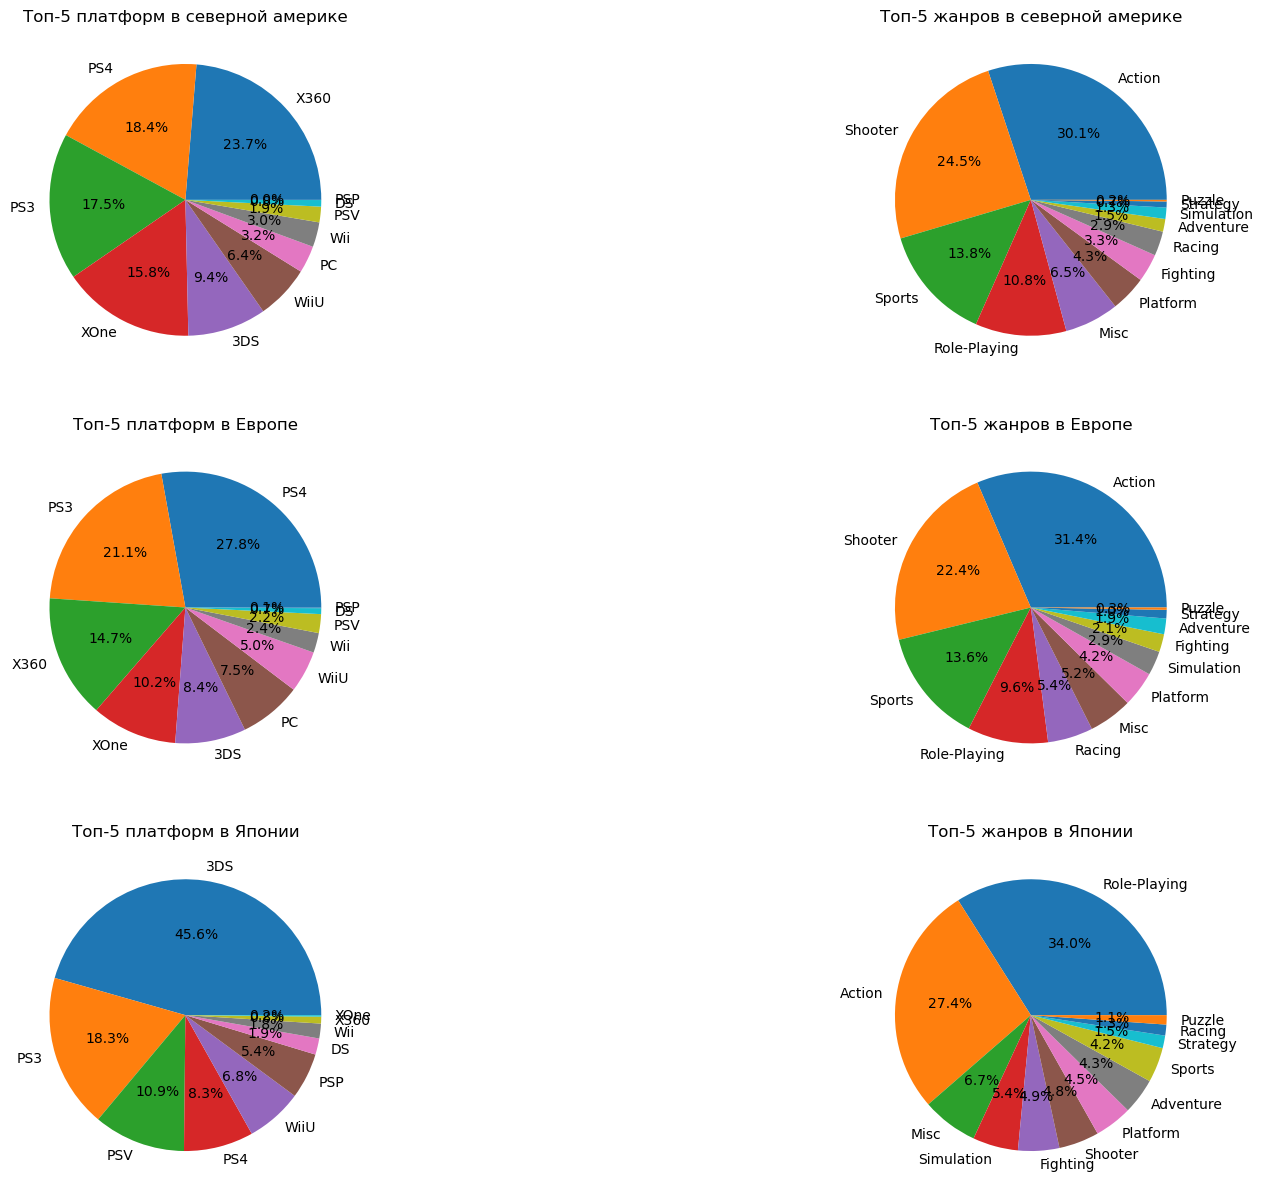

In [37]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

axes[0][0].pie(df_na_p['na_sales_sum'], labels=df_na_p['platform'], autopct='%1.1f%%')
axes[0][0].set_title('Топ-5 платформ в северной америке')

axes[0][1].pie(df_na_g['na_sales_sum'], labels=df_na_g['genre'], autopct='%1.1f%%')
axes[0][1].set_title('Топ-5 жанров в северной америке')

axes[1][0].pie(df_eu_p['eu_sales_sum'], labels=df_eu_p['platform'], autopct='%1.1f%%')
axes[1][0].set_title('Топ-5 платформ в Европе')

axes[1][1].pie(df_eu_g['eu_sales_sum'], labels=df_eu_g['genre'], autopct='%1.1f%%')
axes[1][1].set_title('Топ-5 жанров в Европе')

axes[2][0].pie(df_jp_p['jp_sales_sum'], labels=df_jp_p['platform'], autopct='%1.1f%%')
axes[2][0].set_title('Топ-5 платформ в Японии')

axes[2][1].pie(df_jp_g['jp_sales_sum'], labels=df_jp_g['genre'], autopct='%1.1f%%')
axes[2][1].set_title('Топ-5 жанров в Японии')

### Вывод

</font><font color='Blue'>

**Вывод**
    
- В Северной Америке и Европе наиболее популярны шутеры, экшен-игры и спортивные симуляторы. В Японии же - экшен и ролевые игры обходят остальные жанры
- В Северной Америке и Европе наиболее популярны платформы от microsoft (X360, XOne) и PlayStation. В Японии Microsoft почти не представлен, лидер - локальный бренд 3DS, следом со значительным отставанием идет PlayStation
- Для Северной Америки и Европы максимальное число продаж приносят игры с рейтингом "взрослые". Для продаж в Японии рейтинг ESRB учитывать смысла нет, потому что большинство продаваемых там игр рейтинга не имеют. 

## Проверка гипотез


Сперва проверим не противоречивость гипотез: видно, что средние пользовательские рейтинги по платформам и по жанрам различаются. При этом для сравниваемых жанров на первый вгляд различия больше

In [38]:
df.loc[df['user_score'] != -1].groupby('platform').agg({'user_score':['mean']})

,user_score
,mean
platform,
3DS,7.033333
DS,7.000000
PC,6.428641
PS3,6.532862
PS4,6.748249
PSP,5.950000
PSV,7.410000
Wii,6.082353


In [39]:
df.loc[df['user_score'] != -1].groupby('genre').agg({'user_score':['mean']})

,user_score
,mean
genre,
Action,6.825048
Adventure,7.466667
Fighting,6.895714
Misc,6.938806
Platform,6.806061
Puzzle,7.633333
Racing,6.151163
Role-Playing,7.258480



При проверке гипотез будет использоваться t-тест для независимых выборок из генеральной совокупности. Предполагается, что генеральные совокупности имеют распределение близкое к нормальному. В качестве нулевой гипотезы используется предположение о равенстве двух средних значений двух выборок между собой. 
    
В качестве альтернативной гипотезы используется двусторонняя гипотеза о том, что средние значения не равны

### Гипотеза о рейтингах XOne и PC 

- Нулевая гипотеза - средние пользовательские рейтинги на этих платформах одинаковые
- Альтернативная гипотеза - средние пользовательские рейтинги неодинаковые
- Уровень значимости 0,01
- Метод проверки - сравнение средних двух генеральных совокупностей в предположении, что дисперсии рейтингов различны


Также сравним между собой рейтинги для нескольких других потенциально перспективных платформ

In [40]:
s1 = df.loc[(df['platform'] == 'XOne') & (df['user_score'] != -1)]['user_score']
s2 = df.loc[(df['platform'] == 'PC') & (df['user_score'] != -1)]['user_score']
results = st.ttest_ind(s1, s2, equal_var=False)
alpha = .01


if results.pvalue < alpha:
    print(results.pvalue, '\n', 'для платформ XOne и PC для уровня значимости', alpha, \
          'есть основания считать, что средние пользовательские рейтинги разные')
else:
    print(results.pvalue, '\n', 'для платформ XOne и PC для уровня значимости', alpha, \
          'нет оснований считать, что средние пользовательские рейтинги разные')
    
    
for pl in ['PS3', 'XOne']:
    s1 = df.loc[(df['platform'] == 'X360') & (df['user_score'] != -1)]['user_score']
    s2 = df.loc[(df['platform'] == pl) & (df['user_score'] != -1)]['user_score']
    results = st.ttest_ind(s1, s2, equal_var=False)
    if results.pvalue < alpha:
        print(results.pvalue, '\n', 'для платформ X360 и', pl, 'для уровня значимости', alpha, \
          'есть основания считать, что средние пользовательские рейтинги разные')
    else:
        print(results.pvalue, '\n', 'для платформ X360 и', pl, 'для уровня значимости', alpha, \
          'нет оснований считать, что средние пользовательские рейтинги разные')

0.5489537965134912 
 для платформ XOne и PC для уровня значимости 0.01 нет оснований считать, что средние пользовательские рейтинги разные
0.028631919227042942 
 для платформ X360 и PS3 для уровня значимости 0.01 нет оснований считать, что средние пользовательские рейтинги разные
0.039080825727528926 
 для платформ X360 и XOne для уровня значимости 0.01 нет оснований считать, что средние пользовательские рейтинги разные


</font><font color='Blue'> 
- для платформ XOne и PC для уровня значимости 0.01 нет оснований считать, что средние пользовательские рейтинги разные
- для платформ X360 и PS3 для уровня значимости 0.01 нет оснований считать, что средние пользовательские рейтинги разные
- для платформ X360 и XOne для уровня значимости 0.01 нет оснований считать, что средние пользовательские рейтинги разные


</font><font color='Blue'>

### Гипотеза о рейтингах Action и Sports

- Нулевая гипотеза - средние пользовательские рейтинги одинаковые 
- Альтернативная гипотеза - средние пользовательские рейтинги этих жанров разные
- Уровень значимости 0,01
- Метод проверки - сравнение средних двух генеральных совокупностей в предположении, что дисперсии рейтингов различны

In [41]:
for g in ['Action', 'Shooter', 'Role-Playing']:
    s3 = df.loc[(df['genre'] == g) & (df['user_score'] != -1)]['user_score']
    s4 = df.loc[(df['genre'] == 'Sports') & (df['user_score'] != -1)]['user_score']
    results = st.ttest_ind(s4, s3, equal_var=False)
    alpha = .01


    if results.pvalue < alpha:
        print(results.pvalue, '\n', 'для жанров Sports и', g, 'для уровня значимости', alpha, \
          'есть основания считать, что средние пользовательские рейтинги разные')
    else:
        print(results.pvalue, '\n', 'для жанров Sports и', g, 'для уровня значимости', alpha, \
          'нет оснований считать, что средние пользовательские рейтинги разные')

4.24307776572644e-20 
 для жанров Sports и Action для уровня значимости 0.01 есть основания считать, что средние пользовательские рейтинги разные
3.1948839302756194e-09 
 для жанров Sports и Shooter для уровня значимости 0.01 есть основания считать, что средние пользовательские рейтинги разные
8.430015136510348e-26 
 для жанров Sports и Role-Playing для уровня значимости 0.01 есть основания считать, что средние пользовательские рейтинги разные



- для жанров Sports и Action для уровня значимости 0.01 есть основания считать, что средние пользовательские рейтинги разные
- для жанров Sports и Shooter для уровня значимости 0.01 есть основания считать, что средние пользовательские рейтинги разные
- для жанров Sports и Role-Playing для уровня значимости 0.01 есть основания считать, что средние пользовательские рейтинги разные


## Вывод

In [42]:
pl_list = ['PS4', 'PS3', 'XOne', 'X360']
g = 'Role-Playing'
df.query('platform in @pl_list and genre == @g').sort_values(by='critic_score', ascending=False).reset_index().head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,1348,Mass Effect 3,PS3,2012,Role-Playing,0.63,0.56,0.03,0.20,93.0,5.5,M,1.42
1,462,Mass Effect 3,X360,2012,Role-Playing,1.94,0.84,0.03,0.24,93.0,5.8,M,3.05
2,303,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
3,1550,Dark Souls II,PS3,2014,Role-Playing,0.40,0.33,0.40,0.15,91.0,8.1,T,1.28
4,2756,Dark Souls II,X360,2014,Role-Playing,0.48,0.18,0.01,0.07,91.0,7.9,T,0.74


</font><font color='Blue'>

**Прогнозы и предложения на следующий год**
    
1. В целом картина довольно безрадостная. По всем платформам идет спад продаж, лучше прочих выглядят крупные игроки типа PS или XBox.
2. Для Северной Америки и Европы стоит сделать акцент на жарах "спорт", и "шутер" для указанных выше платформ (X360, PS4, PS3). Это обеспечит стабильный поток выручки. С жанром "экшен" как показало исследование, надо быть осторожнее. При низких медианных продажах изредка выходят игры в этом жанре, которые "выстреливают", и завышают общую картину по продажам
3. В Америке и Европе наибольшее число продаж приносят игры с рейтингом M. Для японии же рейтинг можно не учитывать. 
4. В качестве нового направления стоит рассмотреть выход на рынок Японии с платформой X360 или PS4, поскольку самая популярная их платформа 3DS последние годы по продажам выглядит плохо. При этом стоит учесть что в Японии более популярны ролевые игры.
Потенциально перспективные новые продукты для рынка Японии:
- MassEffect 3
- Witcher3 (ага, щас:))
5. На отзывы пользователей обращать внимания точно нет смысла. Отзывы критиков могут использоваться для выбора продукта, но не в качестве определяющего критерия. В первую очередь надо смотреть по платформе, жанру и рейтингу
    
    
6. Для предлагаемых платформ и жанров следует иметь в виду, что по имеющимся данным с уровнем значимости 1% пользовательские оценки для различных платформ не различаются, а для различных жанров - различаются.